# 小眼球患者的IOL度数计算

## 数据读取和清洗

In [1]:
# 导入必要的工具包
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split


读取数据记录, 数据放置在`data\IOL_data.csv`文件中, 由于csv文件相对于excel文件更容易处理一些, 所以在excel中将原始数据另存为csv文件. 为方便操作, 将原来的中文字段名手工修改成英文字段名.

In [2]:
filename=os.path.join("data","IOL_data.csv") # 避免不同操作系统路径书写格式不同
df = pd.read_csv(filename)
df.head() # 显示数据前5行

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type,comment
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis,NaN
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,-0.50,NaN,NaN,NaN,1.0,21.0,-0.25,tecnis,NaN
2,尉淑霞,74.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.25,-1.50,85.0,NaN,NaN,25.0,-0.16,tecnis,NaN
3,尉淑霞,74.0,2,2,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25,-2.00,105.0,NaN,NaN,24.0,-0.21,tecnis,颞侧视岛
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis,NaN


其中, 包含的字段名为如下:

In [3]:
print(df.columns)

Index(['name', 'age', 'gender', 'eye', 'op', 'AL', 'K1', 'K2', 'ACD', 'Pen_B',
       'Pen_A', 'UBM_B', 'UBM_A', 'ACD_Pen', 'DS', 'DC', 'Axis', 'VA', 'BCVA',
       'IOL', 'target', 'IOL_type', 'comment'],
      dtype='object')


其中, 术前已知的数据字段是:

In [4]:
pre_op_columns=['age', 'gender', 'eye', 'op', 
             'AL', 'K1', 'K2', 'ACD',
             'Pen_B','UBM_B', 'ACD_Pen',
             'IOL', 'target', 'IOL_type']

术后测量得到的数据字段是:

In [5]:
post_op_columns=['DS', 'DC', 'Axis', 'VA', 'BCVA']

备注字段"comment", 对此次计算并无必要, 因此删除

In [6]:
df.drop('comment', axis=1, inplace=True)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,UBM_A,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,2.46,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,NaN,-0.50,NaN,NaN,NaN,1.0,21.0,-0.25,tecnis
2,尉淑霞,74.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,...,2.64,NaN,-1.25,-1.50,85.0,NaN,NaN,25.0,-0.16,tecnis
3,尉淑霞,74.0,2,2,1.0,NaN,NaN,NaN,NaN,NaN,...,3.29,NaN,0.25,-2.00,105.0,NaN,NaN,24.0,-0.21,tecnis
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,2.83,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis


空缺的数据当前以NaN表示, 即“Not a Number”, 但NaN并不能加入计算, 所以需要对数据进行清洗.

数据清洗方案可以是:
* 清除包含NaN的数据行,
* 或将NaN替换成合理的数据.

对于柱镜度数DC和柱镜轴位, NaN数据可以使用0替换之

In [7]:
replace_nan_values={'DC':0, 'Axis':0}
df.fillna(value=replace_nan_values, inplace=True)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,UBM_A,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,2.46,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,NaN,-0.50,0.00,0.0,NaN,1.0,21.0,-0.25,tecnis
2,尉淑霞,74.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,...,2.64,NaN,-1.25,-1.50,85.0,NaN,NaN,25.0,-0.16,tecnis
3,尉淑霞,74.0,2,2,1.0,NaN,NaN,NaN,NaN,NaN,...,3.29,NaN,0.25,-2.00,105.0,NaN,NaN,24.0,-0.21,tecnis
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,2.83,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis


对于其他关键的字段, 如果缺失数据, 则清除该行

In [8]:
key_columns=['age', 'gender', 'eye', 'op', 
             'AL', 'K1', 'K2', 'ACD', 
             #'Pen_B','Pen_A', 
             'UBM_B', 
             #'UBM_A', 'ACD_Pen', 
             'DS', 'DC', 'Axis', 
             #'VA', 'BCVA',
             'IOL', 'target', 'IOL_type']

In [9]:
df.dropna(subset=key_columns, inplace=True)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,UBM_A,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type
31,孟宪华,78.0,2,1,1.0,23.88,43.72,44.70,2.43,NaN,...,NaN,NaN,1.00,-1.75,115.0,0.60,0.8,19.5,-0.18,hoya
32,孟宪华,78.0,2,2,1.0,23.53,43.60,44.18,3.83,NaN,...,NaN,NaN,-0.50,-0.50,95.0,0.15,0.3,20.0,-0.10,hoya
33,刘宝琴,71.0,2,1,1.0,23.35,43.55,44.58,2.70,NaN,...,3.68,NaN,0.00,-1.00,5.0,0.80,0.8,21.0,-0.10,hoya
34,刘宝琴,71.0,2,2,1.0,23.30,44.06,45.61,2.99,NaN,...,3.69,NaN,-0.75,-0.50,168.0,0.60,0.8,21.0,-0.15,hoya
35,李恩莲,64.0,2,1,1.0,21.82,43.16,44.35,2.06,NaN,...,3.26,NaN,-1.00,-0.75,75.0,NaN,0.6,27.0,0.11,hoya


## 数据One-hot重编码

对于类别数据, 例如gender, eye, op等, 当前使用数字进行标注, 但这些数字之间并没有运算关系, 例如gender=2, 并不能够理解成gender=1+1, 因此在后续的计算中, 使用数字进行标注可能会引起模型预测的错误, 所以应当对类别数据进行one-hot编码, 例如:

|gender|male|female|
|:--|:--|:--|
|1|1|0|
|2|0|1|

In [10]:
categorical_columns=['gender', 'eye', 'op'] # 这些是类别形式的字段名
for c in categorical_columns:
    df[c]=pd.Categorical(df[c]) # 将这些字段设定称pandas的Categorical型数据

In [11]:
categorical_dict={'gender':["male","female"], 
                  'eye':['OD','OS'], 
                  'op':['op1', "op2",'op3','op4']}
for k, v in categorical_dict.items():
    dfDummies = pd.get_dummies(df[k])
    dfDummies.columns=v[:len(dfDummies.columns)] # 有可能有4种手术方式, 但因为数据清洗, 只剩下1种或者2种
    df = pd.concat([df, dfDummies], axis=1)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,VA,BCVA,IOL,target,IOL_type,male,female,OD,OS,op1
31,孟宪华,78.0,2,1,1.0,23.88,43.72,44.70,2.43,NaN,...,0.60,0.8,19.5,-0.18,hoya,0,1,1,0,1
32,孟宪华,78.0,2,2,1.0,23.53,43.60,44.18,3.83,NaN,...,0.15,0.3,20.0,-0.10,hoya,0,1,0,1,1
33,刘宝琴,71.0,2,1,1.0,23.35,43.55,44.58,2.70,NaN,...,0.80,0.8,21.0,-0.10,hoya,0,1,1,0,1
34,刘宝琴,71.0,2,2,1.0,23.30,44.06,45.61,2.99,NaN,...,0.60,0.8,21.0,-0.15,hoya,0,1,0,1,1
35,李恩莲,64.0,2,1,1.0,21.82,43.16,44.35,2.06,NaN,...,NaN,0.6,27.0,0.11,hoya,0,1,1,0,1


## 利用现有IOL公式计算

直接用机器学习猜出所有的公式可能需要很多数据, 所以不妨先使用现有公式进行初步的运算, 然后再用机器学习来拟合残差, 可能效果会更好

似乎也没啥作用, 反正先放在这吧

In [12]:
# from compute_IOL import SRK_T # 这是以前写过的人工晶体计算公式, 存放再compute_IOL.py中, 此处直接导入

In [13]:
# A_const_dict={"hoya":118.4,} # 此处根据不同的IOL_type来设定A常数
# IOL_calc_func=SRK_T

In [14]:
# df['IOL_calc']=df.apply(lambda row: 
#                         IOL_calc_func(row['AL'], 
#                               (row["K1"]+row["K2"])/2, 
#                               A_const_dict[row['IOL_type']], 
#                               row["target"]), 
#                         axis=1)

## 数据分组

将清理后数据分成: X, y, 用X来估计y, 其中又要分成训练集和测试集. 




In [15]:
X_columns=['age', 'male','female', 'OD','OS', 'op1', 
             'AL', 'K1', 'K2', 'ACD',
#              'Pen_B','UBM_B', 'ACD_Pen',
             'IOL', 'target', 
#            "IOL_calc"
          ]
X=df[X_columns]

In [16]:
y_columns=['DS', 'DC']
y=df['DS']+df['DC']/2

In [17]:
random_state=0
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.2, random_state=random_state) # 总数据中有20%的数据作为测试集

In [18]:
print("训练集中, X_train具有{}行数据, y_train具有{}行数据".format(len(X_train),len(y_train)))
print("测试集中, X_test具有{}行数据, y_test具有{}行数据".format(len(X_test),len(y_test)))

训练集中, X_train具有25行数据, y_train具有25行数据
测试集中, X_test具有7行数据, y_test具有7行数据


## 机器学习


### 随机森林拟合

随机森林反正是设置最简单的模型了. 拿这个试试先.

使用

In [19]:
print("使用以下变量作为X:\n{}".format(X_columns))
print("对以下变量进行预测y:\n{}".format(y_columns))

使用以下变量作为X:
['age', 'male', 'female', 'OD', 'OS', 'op1', 'AL', 'K1', 'K2', 'ACD', 'IOL', 'target']
对以下变量进行预测y:
['DS', 'DC']


In [20]:
# 导入必要的工具包
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
# Feature Scaling
# 将输入的数据进行缩放, 归一化, 这一步并非必须, 但是可能提高模型的训练效果. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [22]:
# 定义一个函数, 用来评估模型, 输出各种评估数据和绘图
def evaluate_model(regressor, X_train, y_train, X_test, y_test, y_pred):
    print('对预测结果的评估')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R-squared score (training): {:.3f}'
         .format(regressor.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
         .format(regressor.score(X_test, y_test)))
    fig, ax = plt.subplots()
    ax.plot(np.linspace(-2,1,20),np.linspace(-2,1,20),'-')
    ax.plot(y_test, y_pred, 'o')

对预测结果的评估
Mean Absolute Error: 0.5442857142857143
Mean Squared Error: 0.3893178571428572
Root Mean Squared Error: 0.6239534094328335
R-squared score (training): 0.878
R-squared score (test): -0.545


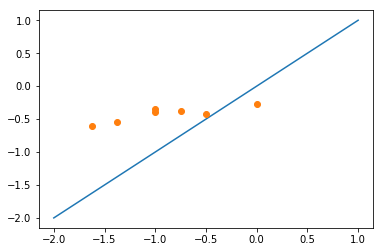

In [23]:
# 使用RandomForestRegressor建立一个拟合器
reg1 = RandomForestRegressor(n_estimators=100, random_state=random_state)
# 代入训练集进行训练
reg1.fit(X_train, y_train)
# 用训练好的模型对测试集进行训练
y_pred = reg1.predict(X_test)
# 评估结果
evaluate_model(reg1,X_train, y_train, X_test, y_test, y_pred)

## GradientBoostingRegressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

对预测结果的评估
Mean Absolute Error: 0.5598175725726076
Mean Squared Error: 0.407595652795316
Root Mean Squared Error: 0.6384321833956337
R-squared score (training): 0.728
R-squared score (test): -0.618


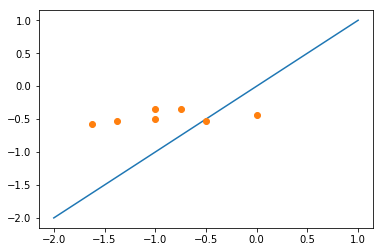

In [25]:
# 使用 GradientBoostingRegressor 建立一个拟合器
reg2 = GradientBoostingRegressor(n_estimators=10, random_state=random_state)
# 代入训练集进行训练
reg2.fit(X_train, y_train)
# 用训练好的模型对测试集进行训练
y_pred = reg2.predict(X_test)
# 评估结果
evaluate_model(reg2, X_train, y_train, X_test, y_test, y_pred)